---


### **Import Libraries**

In [1]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']


# NOTE notebook is based off those used for decision trees and random forest models from previous assignments/labs

### **Load Dataset as DataFrame**

In [2]:
chd_df = pd.read_csv('framingham.csv')
chd_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## *Drop Null Values (not actually necessary for this dataset)*

In [3]:
# Dropping null values
chd_df.dropna(inplace = True)
chd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


## *Check Distribution of 10 Year Coronary Heart Disease Risk Column*

In [4]:
# Distribution of fetal_health column
chd_df['TenYearCHD'].value_counts(normalize = True)

TenYearCHD
0    0.847731
1    0.152269
Name: proportion, dtype: float64

### **Select Input and Output Features**

In [5]:
# Output column for prediction
output = chd_df['TenYearCHD'] 

# Input features
features = chd_df[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

### **Data Partitioning**

In [6]:
train_X, test_X, train_y, test_y = train_test_split(features, output, test_size = 0.2, random_state = 1) 

## **Prediction Modeling using AdaBoost**

In [7]:
# used chatgpt for help here
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(train_X, train_y)

train_score = clf.score(train_X, train_y)
print(f"Training accuracy: {train_score:.4f}")

test_score = clf.score(test_X, test_y)
print(f"Test accuracy: {test_score:.4f}")


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training accuracy: 0.8660
Test accuracy: 0.8388


### *no tree plot for ada?*

### **Model Evaluation**

#### **Evaluation on Train Set**

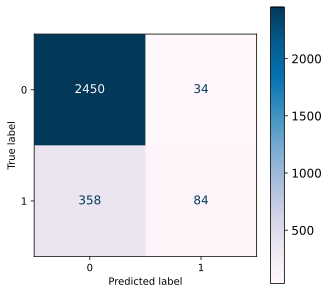

In [8]:
# Predictions on training set
y_pred_train = clf.predict(train_X)

# Now generate confusion matrix
cm = confusion_matrix(train_y, y_pred_train, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuBu', ax = ax);

#### **Evaluation on Test Set**

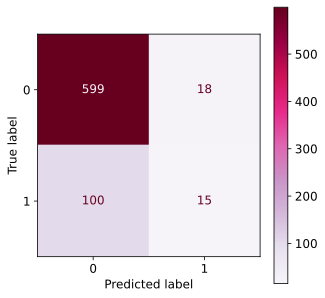

In [9]:
# Predictions on test set
y_pred = clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax)

# Save as SVG
plt.savefig("confusion_mat_Ada.svg", bbox_inches = 'tight');

**Choosing Colormaps in Matplotlib**: [**Check this link**](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

#### **Classification Report**

In [10]:
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# Save the report as a CSV File
report_df.to_csv('class_report_Ada.csv') 

#### **Feature Importance Analysis**

It helps answer questions like:
**“Which features are most important in determining the output?”**

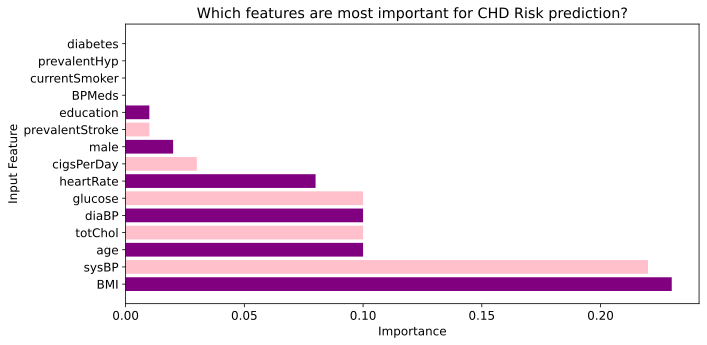

In [11]:
# Storing importance values from the trained model
importance = clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize = (10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are most important for CHD Risk prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_Ada.svg");

## **Save Your Prediction Model**

**Using Pickle**


**Pickle** is a useful Python tool that allows you to save your ML models, to minimise lengthy re-training and allow you to share, commit, and re-load pre-trained machine learning models.

In [13]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
ada_pickle = open('AdaBoost_chd.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf, ada_pickle) 

# Close the file
ada_pickle.close() 